# Data Exploration Analysis
## Target summary

- one peak distribution
- positive kurtousis (sharp peak)
- posistve skewness ()

In [10]:
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')
pd.options.display.float_format = '{:g}'.format

### Load

In [12]:
data_file_path = '../input/train.csv'
data_load_params = dict(
    # sep=',',
    # header=0,
    index_col='Id',
    # na_values=['NA', 'None'],
    # keep_default_na=True,
)
y_name = 'SalePrice'

data_set = pd.read_csv(data_file_path, **data_load_params)
y = data_set[y_name]

### Summary

In [3]:
y_descr = {
    'type': y.dtype,
    'unique': y.nunique(),
    'null': y.isnull().sum(),
    # 'notnull': y.notnull().sum(),
    'notnull': y.count(),
}
y_descr = pd.DataFrame(
    {y_name: y_descr}
).loc[
    ['type', 'unique', 'null', 'notnull'], :
]

y_descr

,SalePrice
type,int64
unique,663
null,0
notnull,1460


#### Describe

In [4]:
y_descr = y.describe()
y_descr = pd.DataFrame(y_descr)

y_descr

,SalePrice
count,1460
mean,180921
std,79442.5
min,34900
25%,129975
50%,163000
75%,214000
max,755000


#### Statistics

In [5]:
y_descr = {
    'median': y.median(),
    'IQR': y.quantile(.75) - y.quantile(.25),
    'mean': y.mean(),
    'std': y.std(),
    'skewness': y.skew(),
    'kurtosis': y.kurtosis(),
}
y_descr = pd.DataFrame(
    {y_name: y_descr}
).loc[
    [
        'median', 'IQR',
        'mean', 'std',
        'skewness', 'kurtosis',
    ], :
]

y_descr

,SalePrice
median,163000
IQR,84025
mean,180921
std,79442.5
skewness,1.88288
kurtosis,6.53628


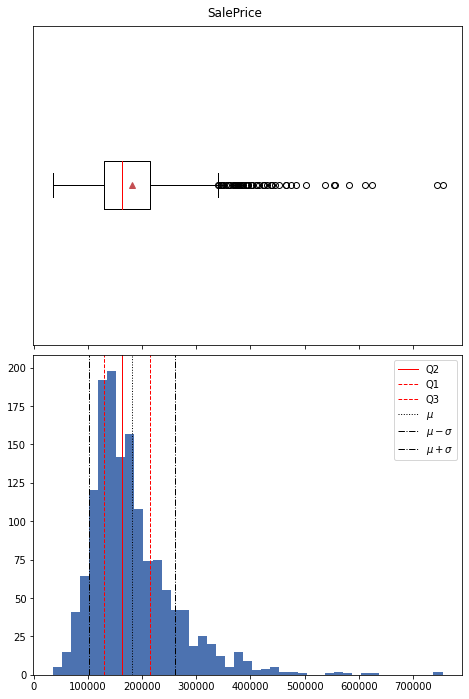

In [9]:
y_min, y_max = y.min(), y.max()
y_Q1, y_Q2, y_Q3 = y.quantile(.25), y.median(), y.quantile(.75)
y_mean, y_std = y.mean(), y.std()

k = 5  # approximate number of histogram bins in the IQR
bins = ceil(k * (y_max - y_min) / (y_Q3 - y_Q1))

nrows, ncols = 2, 1  # size of subplot grid

subplot_props = dict(
    sharex=True,
    figsize=(6.4 * ncols, 4.8 * nrows),
    constrained_layout=True,
)

median_props = dict(
    color='red',
    linestyle='solid',
    linewidth=1,
)
quantile_props = dict(
    color='red',
    linestyle='dashed',
    linewidth=1,
)
mean_props = dict(
    color='black',
    linestyle='dotted',
    linewidth=1,
)
std_props = dict(
    color='black',
    linestyle='dashdot',
    linewidth=1,
)

boxplot_props = dict(
    vert=False,
    showmeans=True,
    medianprops=median_props,
    # boxprops=quantile_props,
)

hist_props = dict(
    bins=bins,
    # label=y.name,
)

fig, axs = plt.subplots(nrows, ncols, **subplot_props)

i = 0
axs[i].boxplot(y, **boxplot_props)
axs[i].set_yticks(ticks=[])

i = 1
axs[i].hist(y, **hist_props)
axs[i].axvline(y_Q2, label='Q2', **median_props)
axs[i].axvline(y_Q1, label='Q1', **quantile_props)
axs[i].axvline(y_Q3, label='Q3', **quantile_props)
axs[i].axvline(y_mean, label=f'$\mu$', **mean_props)
axs[i].axvline(y_mean - y_std, label='$\mu - \sigma$', **std_props)
axs[i].axvline(y_mean + y_std, label='$\mu + \sigma$', **std_props)
axs[i].legend()

fig.suptitle(y.name)

plt.show()